mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rrebirrth/animals-with-attributes-2
License(s): unknown
animals-with-attributes-2.zip: Skipping, found more recently modified local copy (use --force to force download)
Veri seti hazırlandı ve dengelendi.
Veri kümesi boyutu: (6500, 128, 128, 3)
Eğitim veri boyutu: (4550, 128, 128, 3), Test veri boyutu: (1950, 128, 128, 3)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 115s 796ms/step - accuracy: 0.2258 - loss: 3.6845 - val_accuracy: 0.3276 - val_loss: 1.8608
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 1.9688 - val_accuracy: 0.4333 - val_loss: 1.6857
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 144s 816ms/step - accuracy: 0.3587 - loss: 1.7996 - val_accuracy: 0.4146 - val_loss: 1.6977
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.4375 - loss: 1.7161 - val_accuracy: 0.3667 - val_loss: 1.7492
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 111s 777ms/step - accuracy: 0.3817 - loss: 1.7098 - val_accuracy: 0.4411 - val_loss: 1.6487
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3750 - loss: 1.6417 - val_accuracy: 0.3667 - val_loss: 1.7091
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 140s 801ms/step - accuracy: 0.4240 - loss: 1.6437 - val_accuracy: 0.4573 - val_loss: 1.6022
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.4062 - loss: 1.7304 - val_accuracy: 0.5667 - val_loss: 1.5510
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 139s 789ms/step - accuracy: 0.4387 - loss: 1.5870 - val_accuracy: 0.4484 - val_loss: 1.6000
Epoch 10/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.3750 - loss: 1.5526 - val

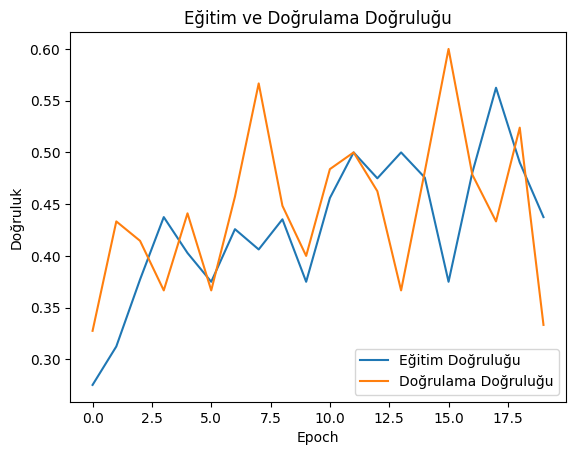

61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.1059 - loss: 216.2537
Manipüle Edilmiş Test Doğruluğu: 10.36%
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.1059 - loss: 216.2537
Manipüle Edilmiş Test Seti Doğruluk: 0.1035897433757782
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.1059 - loss: 215.2529
Renk Sabitliği Uygulanmış Test Doğruluğu: 10.36%
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.1059 - loss: 215.2529
Renk Sabitliği Uygulanmış Test Seti Doğruluk: 0.1035897433757782
Orijinal Test Seti Doğruluğu: 56.62%
Manipüle Edilmiş Test Seti Doğruluğu: 10.36%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 10.36%


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Kaggle API anahtarınızı yükleyin ve veri kümesini indirin
from google.colab import files
import zipfile

# Kaggle API anahtarınızı yükleyin
!pip install -q kaggle
# Kaggle API anahtarını Colab'a yüklemek için
from google.colab import files
files.upload()  # Bu adımda Kaggle API anahtarınızı seçin (kaggle.json)

# Kaggle API anahtarını /root/.kaggle dizinine taşıyalım
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Kaggle dataset'ini indir
!kaggle datasets download -d rrebirrth/animals-with-attributes-2

# İndirilen zip dosyasını çıkartalım
with zipfile.ZipFile('animals-with-attributes-2.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Animals_with_Attributes2')

# Veri seti klasörlerinin yolları
source_dir = "/content/Animals_with_Attributes2/Animals_with_Attributes2/JPEGImages"  # Veri seti klasörünün yolu
target_dir = "/content/FilteredImages"  # Filtrelenmiş verilerin kaydedileceği yol

# Kullanılacak sınıflar
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
images_per_class = 650

# Filtreleme
os.makedirs(target_dir, exist_ok=True)
for class_name in selected_classes:
    class_path = os.path.join(source_dir, class_name)
    target_path = os.path.join(target_dir, class_name)
    os.makedirs(target_path, exist_ok=True)
    for i, file_name in enumerate(os.listdir(class_path)):
        if i >= images_per_class:
            break
        full_file_name = os.path.join(class_path, file_name)
        if os.path.isfile(full_file_name):
            cv2.imwrite(os.path.join(target_path, file_name), cv2.imread(full_file_name))
print("Veri seti hazırlandı ve dengelendi.")

# Görüntülerin işlenmesi (128x128 boyutlandırma ve normalizasyon)
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img_resized = cv2.resize(img, image_size)
                    img_normalized = img_resized / 255.0
                    images.append(img_normalized)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

data_dir = target_dir
X, y = load_and_process_images(data_dir)
print(f"Veri kümesi boyutu: {X.shape}")

# Etiketlerin dönüştürülmesi
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Veriyi bölme (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)
print(f"Eğitim veri boyutu: {X_train.shape}, Test veri boyutu: {X_test.shape}")

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# CNN Modeli
model = Sequential([
    Input(shape=(128, 128, 3)),  # Burada Input kullanılıyor
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplama
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modeli eğitme
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

# Eğitim sürecinin görselleştirilmesi (Opsiyonel)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()
# Manipülasyon fonksiyonu
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=0.8, beta=30)  # Örnek manipülasyon
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

X_test_manipulated = get_manipulated_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Doğruluğu: {manipulated_accuracy * 100:.2f}%")
# Manipüle edilmiş test seti üzerinde test etme
test_loss, test_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Seti Doğruluk: {test_accuracy}")
# Gray World algoritması (örnek)
def gray_world(images):
    wb_images = []
    for img in images:
        avg_b = np.mean(img[:, :, 0])
        avg_g = np.mean(img[:, :, 1])
        avg_r = np.mean(img[:, :, 2])
        avg_gray = (avg_b + avg_g + avg_r) / 3
        img[:, :, 0] = img[:, :, 0] * (avg_gray / avg_b)
        img[:, :, 1] = img[:, :, 1] * (avg_gray / avg_g)
        img[:, :, 2] = img[:, :, 2] * (avg_gray / avg_r)
        wb_images.append(img)
    return np.array(wb_images)

# Manipüle edilmiş test verisine Gray World algoritmasını uygulama
X_test_corrected = gray_world(X_test_manipulated)

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Doğruluğu: {corrected_accuracy * 100:.2f}%")
test_loss, test_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluk: {test_accuracy}")
# Orijinal test setinde doğruluk hesaplama
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Orijinal Test Seti Doğruluğu: {test_accuracy * 100:.2f}%")

# Manipüle edilmiş test setinde doğruluk hesaplama
X_test_manipulated = get_manipulated_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test, verbose=0)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")

# Renk sabitliği uygulanmış test setinde doğruluk hesaplama
X_test_corrected = gray_world(X_test_manipulated)
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test, verbose=0)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")

